In [7]:
import anndata
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import squidpy as sq

In [8]:
slice1 = anndata.read_h5ad('/SABench/data/Flysta3D_processed/E14_16/Stereoseq_3_processed.h5ad')
slice2 = anndata.read_h5ad('/SABench/data/Flysta3D_processed/E14_16/Stereoseq_4_processed.h5ad')

/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cma

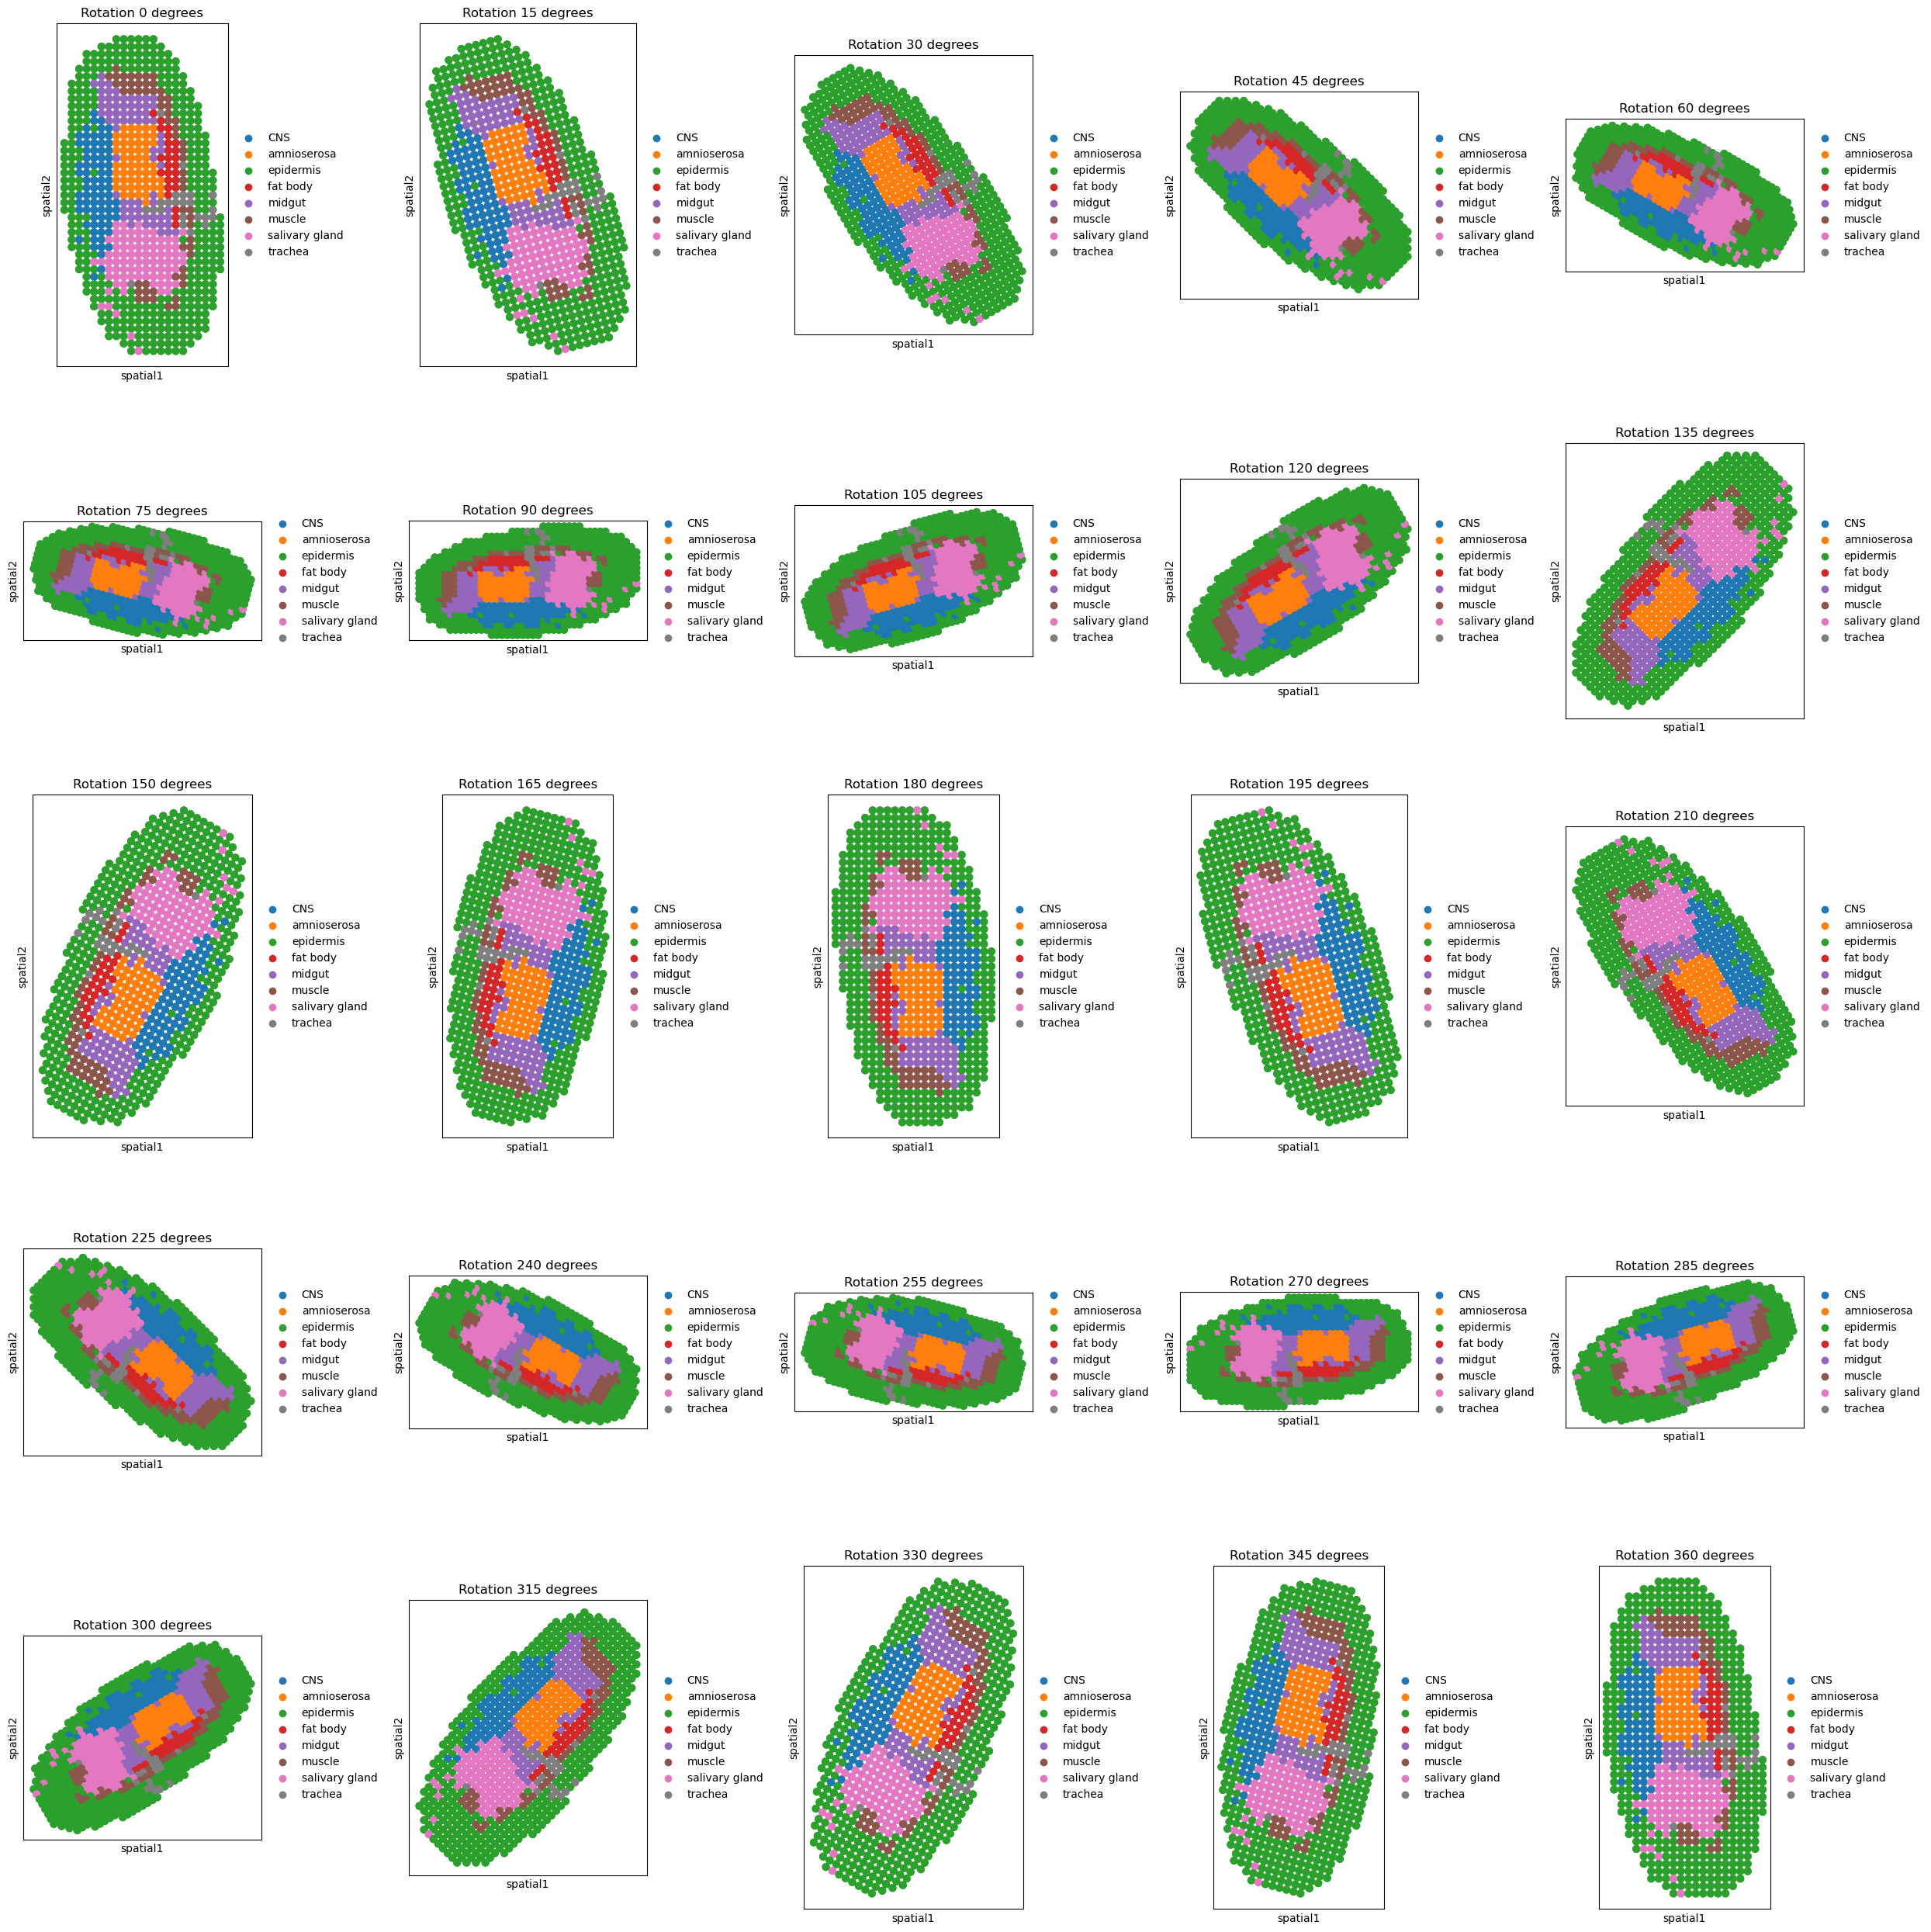

AnnData object with n_obs × n_vars = 713 × 13668
    obs: 'slice_ID', 'raw_x', 'raw_y', 'new_x', 'new_y', 'new_z', 'annotation', 'Region', 'total_counts'
    obsm: 'spatial', 'spatial_GT'

In [9]:
def rotate_adata(slice, degree,save_path):
    adata=slice.copy()
    coords = adata.obsm['spatial']
    # 
    center = np.mean(coords, axis=0)

    # 
    coords_centered = coords - center

    theta = np.radians(degree)
    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    rotated_coords = np.dot(coords_centered, rotation_matrix)

    # 
    rotated_coords = rotated_coords + center

    adata.obsm['spatial'] = rotated_coords
    adata.write_h5ad(save_path)
    return adata

angles = [i for i in range(0, 361, 15)]
fig, axs = plt.subplots(5, 5, figsize=(25, 25)) 

for index,degree in enumerate(angles):
    new_slice = rotate_adata(slice2, degree, f'/SABench/Data/Flysta_rotated/Flysta_2_rotated_{degree}.h5ad') 
    i = index // 5  
    j = index % 5  

    # 
    sq.pl.spatial_scatter(new_slice,library_id="spatial",shape=None,color="Region",wspace=1,ax=axs[i,j])

    #axs[index].invert_yaxis()

    axs[i,j].set_title(f'Rotation {degree} degrees')

plt.tight_layout()
plt.show()

rotate_adata(slice1, 0, f'/SABench/Data/Flysta_rotated/Flysta_1_rotated_0.h5ad')